#### Unit 4: Exercise 1

This exercise uses data from the Youth Risk Factor Behavior Surveillance System (YRBSS), a yearly survey conducted by the US Centers for Disease Control to measure health-related activity in high-school aged youth. The dataset \texttt{yrbss} in the OIBioStat package contains responses from the 13,572 participants in 2013 for a subset of the variables included in the complete survey data. 

Variables in the dataset include:

  - age: age in years

  - gender: gender of participant, recorded as either female or male
  
  - grade: grade in high school (9-12)
  
  - height: height, in meters (1 m = 3.28 ft)
  
  - weight: weight, in kilograms (1 kg = 2.2 lbs)
  
  - helmet.12m: frequency that the student wore a helmet while biking in the last 12 months, either always, most of time, sometimes, rarely, never, or did not ride
  
  - physically.active.7d: number of days physically active for 60+ minutes in the last 7 days
  
  - strength.training.7d: number of days of strength training in the last 7 days

  
The CDC used the responses from the 13,572 students to estimate the health behaviors of the target population: the 21.2 million high school aged students in the US in 2013. 

**Goal**: Observe the effect of sampling by treating the 13,572 individuals in `yrbss` as our target population, and drawing random samples. How do point estimates of mean weight, $\overline{x}_{weight}$, calculated from random samples compare to the population parameter, $\mu_{weight}$?



#### Problem 1:
(a) Use the code from class to draw a sample of size 10 from the yrbss data


#### Solution:

In [3]:
#load("yrbss.rda")
require(oibiostat)
data(yrbss)
head(yrbss)

Loading required package: oibiostat


age,gender,grade,hispanic,race,height,weight,helmet.12m,text.while.driving.30d,physically.active.7d,hours.tv.per.school.day,strength.training.7d,school.night.hours.sleep
14,female,9,not,Black or African American,NA,NA,never,0,4,5+,0,8
14,female,9,not,Black or African American,NA,NA,never,NA,2,5+,0,6
15,female,9,hispanic,Native Hawaiian or Other Pacific Islander,1.73,84.37,never,30,7,5+,0,<5
15,female,9,not,Black or African American,1.60,55.79,never,0,0,2,0,6
15,female,9,not,Black or African American,1.50,46.72,did not ride,did not drive,2,3,1,9
15,female,9,not,Black or African American,1.57,67.13,did not ride,did not drive,1,5+,0,8


In [4]:
require(dplyr)
set.seed(5011) 
yrbss.sample = sample_n(yrbss, size=10)

(b) How many students of each gender have been sampled? What is the mean age of the sampled students?

#### Solution:

In [5]:
yrbss.sample %>%
    group_by(gender) %>%
    summarize(n=n(),mean=mean(age,na.rm=TRUE))

yrbss.sample %>%
    summarize(n=n(),mean=mean(age,na.rm=TRUE))

gender,n,mean
female,8,16.125
male,2,18.000


n,mean
10,16.5


(c) Calculate $\overline{x}_{weight}$ and $s_{weight}$, the mean and standard deviation of weight in the sample. 


#### Solution:

In [6]:
yrbss.sample %>%
    summarize(mean=mean(weight,na.rm=TRUE),sd=sd(weight, na.rm = TRUE))

mean,sd
68.131,12.03221


(d) Calculate $\mu_{weight}$, the mean weight in the `yrbss` population. 

#### Solution:

In [7]:
yrbss %>%
    summarize(mean=mean(weight,na.rm=TRUE),sd=sd(weight, na.rm = TRUE))

mean,sd
67.9065,16.89821


(e) Take a new random sample of size 10 from `yrbss`, changing the seed to be the the last four digits of your Mount Holyoke ID. What is $\overline{x}_{weight}$, as calculated from your sample? Does it differ from $\overline{x}_{weight}$ as calculated in part (d)? How do these point estimates compare to the population parameter $\mu_{weight}$?

#### Solution:

In [8]:
set.seed(6925) 
yrbss.sample2 = sample_n(yrbss, size=10)

yrbss.sample2 %>%
    summarize(mean=mean(weight,na.rm=TRUE))

mean
68.39333


From this sample, $\overline{x}_{weight}$ is 68.39kg. It is larger than the sample mean calculated in part c)(68.13 kg) of the previous question and the population parameter $\mu_{weight}$ (67.91kg). 

#### Problem 2:

(a) Take 1,000 random samples of size 10 from `yrbss`. For each sample, calculate the mean weight for participants in the sample and stores the value in the vector `sample.means`.

#### Solution:

In [16]:
require(mosaic)
sample.means = do(1000) * {
    yrbss.sample = sample_n(yrbss, size=10)
    yrbss.sample %>%
    summarize(mean=mean(weight,na.rm=TRUE))
    }
head(sample.means)

mean
68.775
67.132
61.373
74.889
64.955
67.042


(b) Describe the distribution of sample means. 

#### Solution:

In [17]:
summary(sample.means)

      mean      
 Min.   :53.63  
 1st Qu.:64.20  
 Median :67.41  
 Mean   :68.02  
 3rd Qu.:71.26  
 Max.   :95.41  

Don't know how to automatically pick scale for object of type do.data.frame/data.frame. Defaulting to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


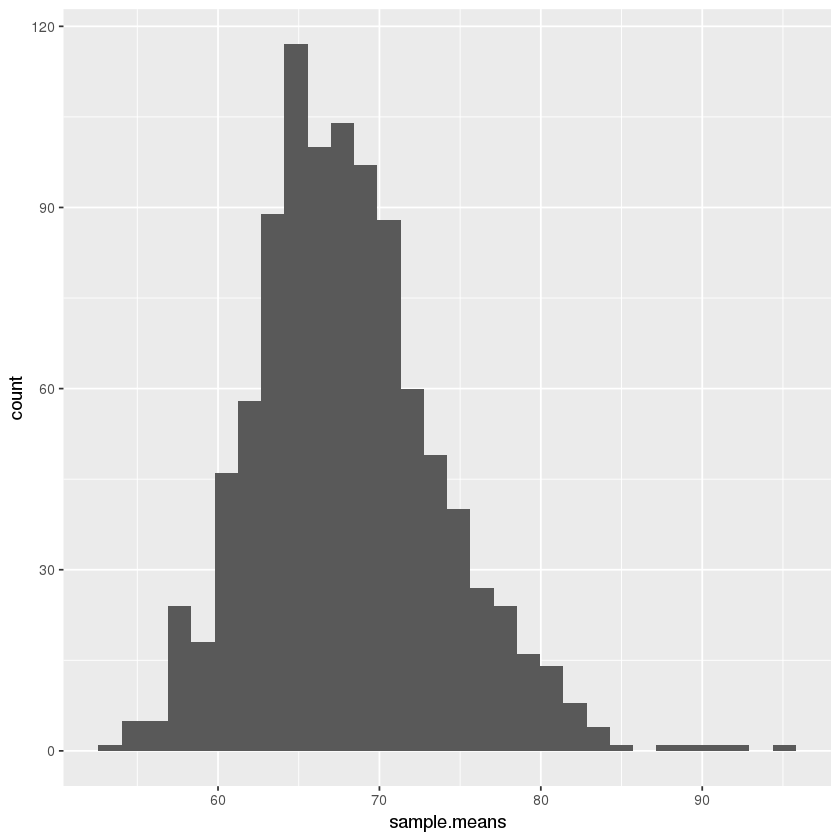

In [18]:
require(ggplot2)
ggplot(data=sample.means,aes(sample.means)) +
    geom_histogram()

Don't know how to automatically pick scale for object of type do.data.frame/data.frame. Defaulting to continuous.


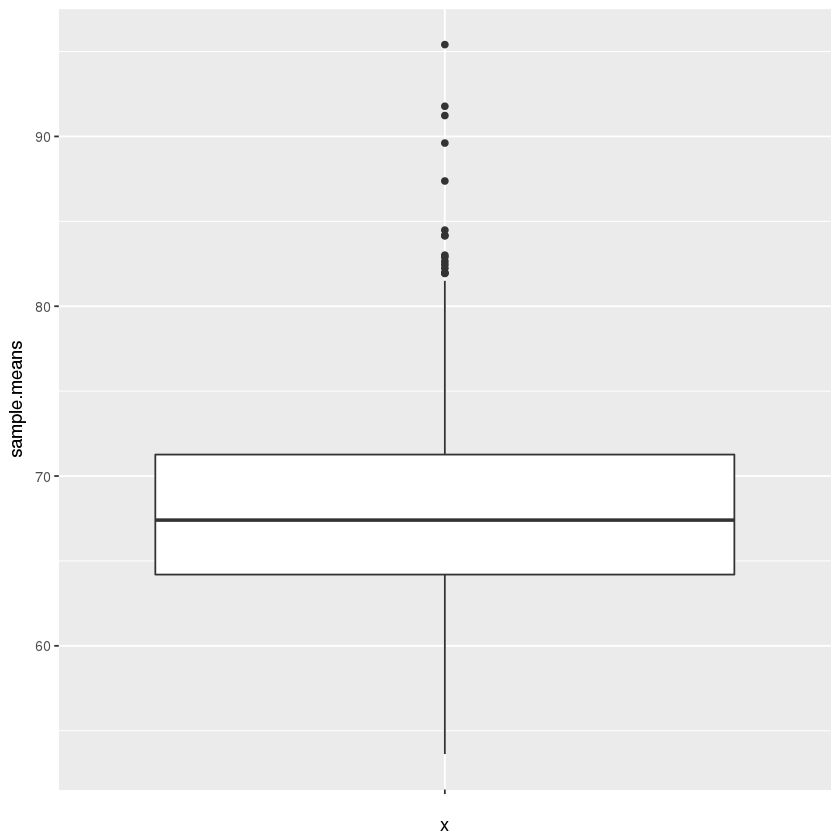

In [19]:
ggplot(data=sample.means,aes(x="",y=sample.means)) +
    geom_boxplot()

The distribution of sample means is somewhat symmetric, with some right skewing. The mean of sample means is about 68 kg, which is close to the population mean weight from `yrbss` of 68.4.

(c) Examine the effect of larger sample sizes by re-running the code for sample sizes of 25, 100, and 1000 and using histograms, describe how the distribution of sample means changes as sample size increases. 

#### Solution:

      mean      
 Min.   :57.44  
 1st Qu.:65.50  
 Median :67.97  
 Mean   :68.08  
 3rd Qu.:70.37  
 Max.   :80.62  

Don't know how to automatically pick scale for object of type do.data.frame/data.frame. Defaulting to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


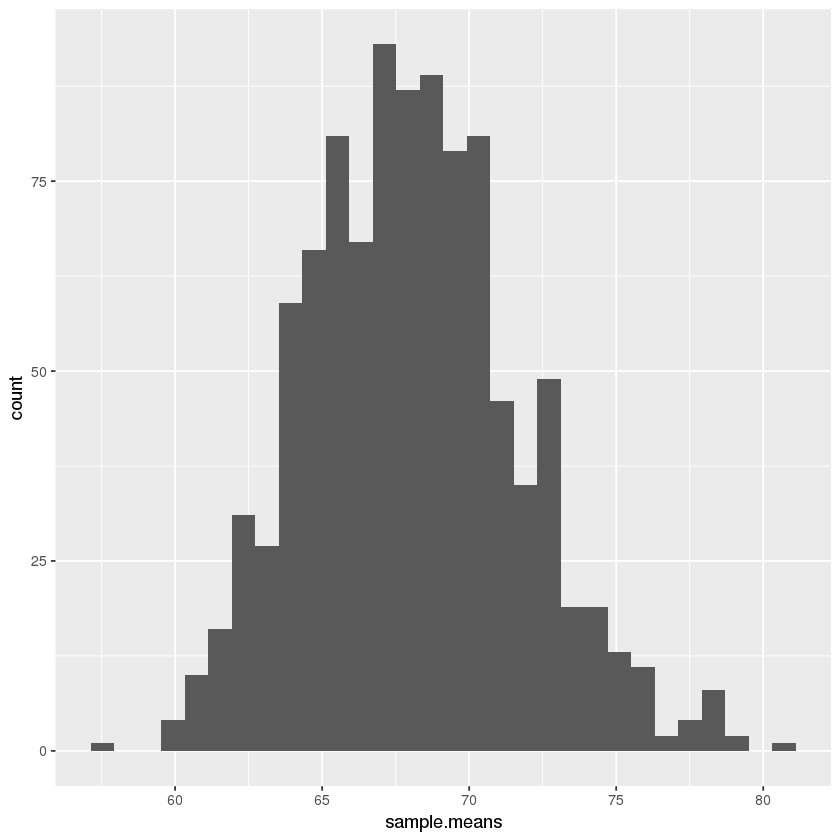

In [21]:
sample.means = do(1000) * {
    yrbss.sample = sample_n(yrbss, size=25)
    yrbss.sample %>%
    summarize(mean=mean(weight,na.rm=TRUE))
    }

summary(sample.means)
ggplot(data=sample.means,aes(sample.means)) +
    geom_histogram()

      mean      
 Min.   :62.61  
 1st Qu.:66.76  
 Median :67.92  
 Mean   :67.96  
 3rd Qu.:69.08  
 Max.   :73.80  

Don't know how to automatically pick scale for object of type do.data.frame/data.frame. Defaulting to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


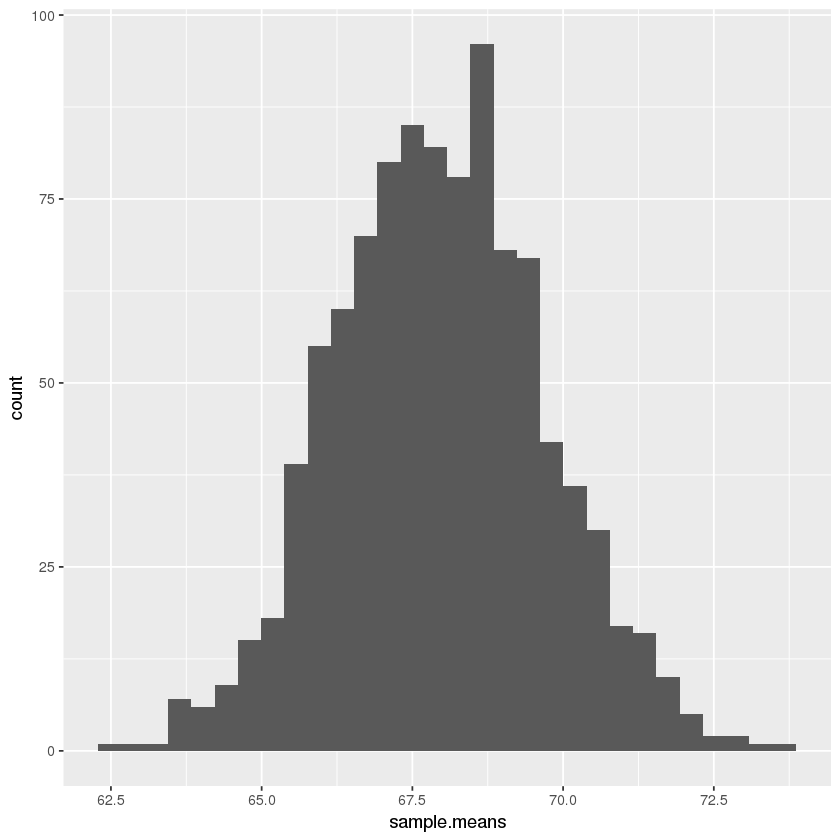

In [22]:
sample.means = do(1000) * {
    yrbss.sample = sample_n(yrbss, size=100)
    yrbss.sample %>%
    summarize(mean=mean(weight,na.rm=TRUE))
    }
summary(sample.means)
ggplot(data=sample.means,aes(sample.means)) +
    geom_histogram()

      mean      
 Min.   :66.53  
 1st Qu.:67.54  
 Median :67.93  
 Mean   :67.91  
 3rd Qu.:68.25  
 Max.   :69.82  

Don't know how to automatically pick scale for object of type do.data.frame/data.frame. Defaulting to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


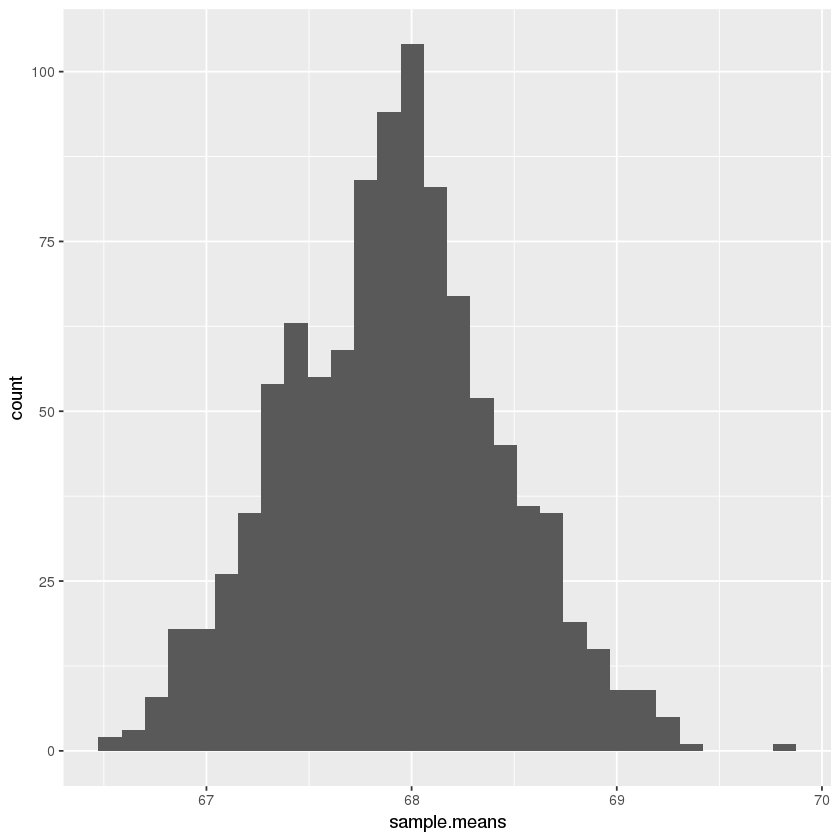

In [24]:
sample.means = do(1000) * {
    yrbss.sample = sample_n(yrbss, size=1000)
    yrbss.sample %>%
    summarize(mean=mean(weight,na.rm=TRUE))
    }
summary(sample.means)
ggplot(data=sample.means,aes(sample.means)) +
    geom_histogram()

As the sample size increases, the spread of the distribution decreases. With a sample size of 10, the sample means rangefrom about 55 kg to 85 kg. Once sample size increases to 1000, the sample means are all between 66 kg and 70 kg. It may be difficult to tell from the plots, but zooming in to the plots shows that the mean of sample means approaches the population mean weight as sample size increases.

(d) Recall that the goal of inference is to learn about characteristics of a target population through the information obtained by taking one sample. What is the advantage of a larger sample size? 

#### Solution:

A larger sample size makes it more likely that the sample mean is close to the population parameter. In other words, a larger sample size increases the chance that the point estimate from a given sample is accurate. 

(e) From what you have observed in this exercise about the relationship between a point estimate for the mean ($\overline{x}$) and the population mean ($\mu$), evaluate the following statement:

*Since the mean weight of the 13,572 sampled high-school students in the 2013 YRBSS survey is 67.91 kg, it is possible to definitively conclude that the mean weight of the 21.2 million high-school aged students in the US in 2013 is also 67.91 kg.*


#### Solution:

It is not possible to conclude that the point estimate from the 13,572 sampled students is precisely equal to the population mean weight across the target population of 21.2 million students. As we have seen from the series of histograms, there is variation from sample to sample; it is quite possible that the mean of this particular sample is not equal to the actual population mean weight. However, it is possible to say that the sample mean is a reasonable estimate of the actual population mean weight, given the large sample size.